In [8]:
import numpy as np
from importlib import reload

In [2]:
batch_size = 4
d = 3

## MSE Loss

In [1]:
y = np.random.randint(2, size=(batch_size, d))
yhat = np.random.randint(2, size=(batch_size, d))
y, yhat

NameError: name 'np' is not defined

In [4]:
np.mean(np.square(y - yhat), axis=1)

array([0.66666667, 0.66666667, 0.33333333, 0.33333333])

In [5]:
np.linalg.norm(y - yhat, axis=1) ** 2

array([2., 2., 1., 1.])

## TanH / Sigmoid

In [2]:
from pylamp import Linear, Tanh, Sigmoid, MSELoss
from pylamp.utils.usps import *

In [3]:
uspsdatatrain = "../data/USPS_train.txt"
uspsdatatest = "../data/USPS_test.txt"
alltrainx,alltrainy = load_usps(uspsdatatrain)
alltestx,alltesty = load_usps(uspsdatatest)
neg, pos = 6, 9
datax,datay = get_usps([neg,pos],alltrainx,alltrainy)
testx,testy = get_usps([neg,pos],alltestx,alltesty)
datay = np.where(datay == pos, 1, 0).reshape(-1, 1)
testy = np.where(testy == pos, 1, 0).reshape(-1, 1)

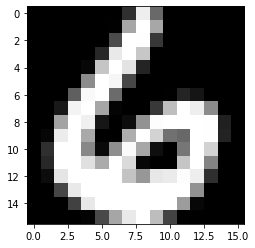

In [4]:
show_usps(datax[0])

In [4]:
batch_size, input_size = datax.shape
hidden_size = 128

In [5]:
model = [Linear(input_size, hidden_size), Tanh(), Linear(hidden_size, 1), Sigmoid()]
mse = MSELoss()

In [14]:
input = datax
inputs = []
for module in model:
    input = module.forward(input)
    inputs.append(input)

input

array([[0.19476428],
       [0.99979567],
       [0.99963771],
       ...,
       [0.97727863],
       [0.82602441],
       [0.31501407]])

In [15]:
loss = mse.forward(datay, input)
loss

array([[3.79331233e-02],
       [9.99591380e-01],
       [9.99275559e-01],
       ...,
       [5.16260876e-04],
       [3.02675060e-02],
       [4.69205718e-01]])

In [19]:
delta = mse.backward(datay, loss)
deltas = []

for idx in range(len(model)-1, 0, -1):
    delta = model[idx].backward_delta(inputs[idx-1], delta)
    deltas.append(delta)

delta

array([[ 9.26593690e-06,  1.89415195e-04,  2.45515955e-05, ...,
         1.55835319e-03,  3.71910504e-10, -4.69463256e-12],
       [ 8.81132614e-13,  6.87947549e-09,  5.16840587e-05, ...,
         1.26769622e-04,  2.25257691e-13, -4.67581431e-10],
       [ 3.69296009e-05,  1.75519839e-09,  3.56794617e-12, ...,
         7.44343787e-05,  1.54818207e-05, -2.69978544e-04],
       ...,
       [-4.40131531e-15, -7.57982669e-04, -5.40070459e-12, ...,
        -1.47764999e-05, -2.30190245e-08,  1.97445922e-03],
       [-1.70395043e-07, -6.93239507e-08, -9.08908641e-09, ...,
        -7.67926886e-09, -2.92620528e-05,  7.57709683e-05],
       [-9.78556603e-07, -2.07451936e-02, -3.82174313e-02, ...,
        -4.96626211e-02, -3.29475050e-02,  5.89214579e-11]])